# PSO effective-mass

20 November 2019

Another probe of the effective mass function, this time fitting to a small number of interlopers as subhalos.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from multiprocessing import Pool

from pso import PSOFit

from helpers import get_mass_back

In [2]:
## General settings ##
zl = .5
zs = 1.0

In [3]:
# zds = [.1,.2,.3,.4,.5,.6,.7,.8,.9] * 2
# seeds = [100] * 9 + [101] * 9
# zds = [.1,.2,.3, .4,.5,.6,.9]
# seeds = [100]*7
# zds = [.3]*4+[.5]*4+[.7]*4
# seeds = [101,102,103,104]*3
zds = [.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75]
seeds = [100]*11
assert(len(zds) == len(seeds))
ilist = range(len(zds))
ncores = 4
N=1 # number of subhalos

In [4]:
def pso_fit_func(i, zd, seed):
    '''
    Just a helper function for multiprocessing.Pool
    '''
    print('running', i)
    ans = PSOFit(N=N, zd=zd, zl=zl, zs=zs,seed=seed, numiter=300, near_ring=True)

    #pso_fit_list[i] = ans
    #ans = 'PSOFIT{}'.format(i)
    return i, ans

class CallbackList:
    def __init__(self,length):
        self.liszt = [None]*length
    
    def __repr__(self):
        return 'CallbackList'+self.liszt.__repr__()
    
    def callback(self, result):
        print('callback')
        assert(len(result) == 2)
        self.liszt[result[0]] = result[1]
        print('my list is now', self.liszt)

pso_fit_callback_list2 = CallbackList(len(zds))

In [5]:
%%time
with Pool(ncores) as pool:
    p_list = []
    for i, zd, seed in zip(ilist, zds, seeds):
        p = pool.apply_async(pso_fit_func, args=(i,zd, seed), callback=pso_fit_callback_list2.callback)
        p_list.append(p)

    for p in p_list:
        p.wait()
        
    for p in p_list:
        p.get()

running 3
running 1
running 0
running 2


2019-12-02 18:50:00,786 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/3002019-12-02 18:50:00,804 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-02 18:50:00,812 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/3002019-12-02 18:50:00,823 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=7.59
2019-12-02 19:00:26,714 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.585039233555983, best pos: [-0.36138747 -2.48809449 -2.40771026  9.55335884]
pyswarms.single.global_best: 100%|██████████|300/300, best_cost=4.28
2019-12-02 19:00:26,743 - pyswarms.single.global_best - INFO - Optimization finished | be

running 4
running 5


2019-12-02 19:00:26,873 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
2019-12-02 19:00:26,873 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

running 6


pyswarms.single.global_best:   0%|          |0/3002019-12-02 19:00:26,950 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [None, <pso.PSOFit object at 0x7f25e7fdaba8>, None, None, None, None, None, None, None, None, None]
callback
my list is now [None, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, None, None, None, None, None, None, None, None]
callback
my list is now [None, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=11.7
2019-12-02 19:00:27,152 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 11.670795466292681, best pos: [-0.19173388 -2.62295807 -2.58150401  9.34582048]


running 7


2019-12-02 19:00:27,286 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, None, None, None, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.388-6 
2019-12-02 19:10:08,311 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.3880086884629258, best pos: [-0.53656617 -2.34240453 -1.81647996 10.29813415]


running 8


2019-12-02 19:10:08,457 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, None, None, <pso.PSOFit object at 0x7f25e7fe1160>, None, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=1.18
2019-12-02 19:10:08,692 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.182392020220335, best pos: [-0.2116878  -2.60735801 -2.38997699 10.67844796]


running 9


2019-12-02 19:10:08,852 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, None, None, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=0.473-6
2019-12-02 19:10:13,367 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.4731514336812854, best pos: [-0.70724178 -2.20002605 -1.90663689  9.92117892]


running 10


2019-12-02 19:10:13,513 - pyswarms.single.global_best - INFO - Optimize for 300 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best:   0%|          |0/300

callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, <pso.PSOFit object at 0x7f25e7fec3c8>, None, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=7.75e-6
2019-12-02 19:10:14,174 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.75280841064927e-06, best pos: [-0.78498856 -2.13645905 -1.79692117  9.97558573]


callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, <pso.PSOFit object at 0x7f25e7fec3c8>, <pso.PSOFit object at 0x7f261bfcfe48>, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, None, None, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=4.37
2019-12-02 19:19:02,572 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 4.36787727797359, best pos: [-3.85138150e-03 -2.71965929e+00 -4.75943537e+00  1.32728136e+01]


callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, <pso.PSOFit object at 0x7f25e7fec3c8>, <pso.PSOFit object at 0x7f261bfcfe48>, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, None, <pso.PSOFit object at 0x7f261bfdda90>, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=2.58
2019-12-02 19:19:03,305 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.5784339328978927, best pos: [-0.0130981  -2.72503207 -2.75487226 12.91564097]


callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, <pso.PSOFit object at 0x7f25e7fec3c8>, <pso.PSOFit object at 0x7f261bfcfe48>, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, <pso.PSOFit object at 0x7f25e7fe1fd0>, <pso.PSOFit object at 0x7f261bfdda90>, None]


pyswarms.single.global_best: 100%|██████████|300/300, best_cost=7.39
2019-12-02 19:19:04,969 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 7.385403856970489, best pos: [-0.02829974 -2.67094326 -7.67955732 14.39538501]


callback
my list is now [<pso.PSOFit object at 0x7f25e7fdae10>, <pso.PSOFit object at 0x7f25e7fdaba8>, <pso.PSOFit object at 0x7f25e7fdaeb8>, <pso.PSOFit object at 0x7f25e7fdafd0>, <pso.PSOFit object at 0x7f25e7fec3c8>, <pso.PSOFit object at 0x7f261bfcfe48>, <pso.PSOFit object at 0x7f25e7fe1160>, <pso.PSOFit object at 0x7f261bfc0cc0>, <pso.PSOFit object at 0x7f25e7fe1fd0>, <pso.PSOFit object at 0x7f261bfdda90>, <pso.PSOFit object at 0x7f261bfeaa58>]
CPU times: user 6.04 s, sys: 2.45 s, total: 8.49 s
Wall time: 29min 4s


With `n_particles = 32`:
* 3 at a time : 5min14 (300 iterations, N=2)
* 2 at a time : 4min2 (300 iterations, N=2)
* 7 : 9min10 (300 iterations, N=1)
* 1 : 3min2 (300 iterations, N=1)
* 4 : 1min50 (100 iterations, N=1)

In [6]:
pso_fit_list = pso_fit_callback_list2.liszt

In [7]:
for pso_fit in pso_fit_list:
    print(pso_fit.almost_truth_args)

[-0.590906213686307, -2.1194117964657204, array(-1.7971705), array(9.97528826)]
[-0.6472620120911758, -2.10002504868422, array(-1.7971705), array(9.97528826)]
[-0.6919569065915183, -2.0945305326010972, array(-1.7971705), array(9.97528826)]
[-0.7282369512536571, -2.100026523221774, array(-1.7971705), array(9.97528826)]
[-0.7581880611772295, -2.1148656057088124, array(-1.7971705), array(9.97528826)]
[-0.7832284724609908, -2.1381977679595376, array(-1.7971705), array(9.97528826)]
[-0.8043650273893628, -2.1697684527436625, array(-1.51616158), array(8.41553363)]
[-0.8223373312784534, -2.209860883883607, array(-1.27264843), array(7.06390128)]
[-0.8377039114521811, -2.2593544672685804, array(-1.05799034), array(5.87243039)]
[-0.8508962878593799, -2.3199275125961574, array(-0.86601199), array(4.80684457)]
[-0.8622542970469951, -2.3945150095858807, array(-0.69218214), array(3.84199295)]


In [25]:
zds

[0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75]

In [26]:
seeds

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

In [27]:
mydict = {}
for zd, seed, pso_fit in zip(zds, seeds, pso_fit_list):
    mydict[(zd,seed)] = pso_fit

In [29]:
import pickle

In [30]:
with open('mydict.p', 'wb') as f:
    pickle.dump(mydict, f)

### Smooth model

In [8]:
fit0 = PSOFit(N=0, zd=zd, zl=zl, zs=zs,numiter=1)
image0 = fit0.pso_img # dumb hacky way to generate smooth-model image

2019-12-02 19:19:05,232 - pyswarms.single.global_best - INFO - Optimize for 1 iters with {'c1': 0.5, 'w': 0.9, 'c2': 0.3}
pyswarms.single.global_best: 100%|██████████|1/1, best_cost=1.34e-22
2019-12-02 19:19:06,081 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 1.3436599719933374e-22, best pos: [-1.30014361 -4.73480173]


In [12]:
vmin = -.1; vmax=.1

Cost for smooth model: 61.17981300490976


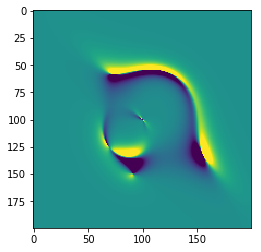

In [14]:
# Cost of the smooth model!!
def error(image1, image2):
    assert(image1.shape == image2.shape)

    diffsq = (image1 - image2).flatten()**2

    skipidx = 20100 # should probably keep this
    return np.sum(diffsq[:skipidx]) + np.sum(diffsq[skipidx+1:])
smooth_cost = error(pso_fit_list[0].image, image0)
print('Cost for smooth model:', smooth_cost)

# For comparison, this is the same image without any subhalos
plt.imshow(pso_fit_list[1].image - image0, vmin=vmin, vmax=vmax)

### Back to subhalo models

Text(0, 0.5, 'rsang')

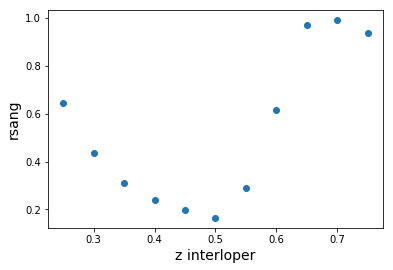

In [15]:
plt.plot(zds, [10**pf.pos[0] for pf in pso_fit_list], 'o')
#plt.axhline(y=2, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('rsang', size=14)

Text(0, 0.5, 'alphars')

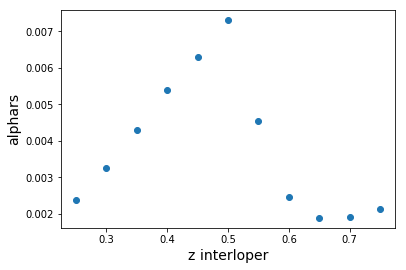

In [16]:
plt.plot(zds, [10**pf.pos[1] for pf in pso_fit_list], 'o')
#plt.axhline(y=3e-4, color='r', linestyle='-')
plt.xlabel('z interloper', size=14)
plt.ylabel('alphars', size=14)

In [ ]:
# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
# plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# #plt.ylim(0,.0001)
# plt.legend()

In [ ]:
# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.scatter([10**pf.pos[0] for pf in z3list], [10**pf.pos[1] for pf in z3list], label='z=.3')
# plt.scatter([10**pf.pos[0] for pf in z7list], [10**pf.pos[1] for pf in z7list], label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# plt.gca().set_yscale('log')
# #plt.ylim(1e-6,2e-4)
# plt.legend()

In [ ]:
# z3list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.3)<1e-6]
# z7list = [pf for zd,pf in zip(zds,pso_fit_list) if abs(zd-.7)<1e-6]

# plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z3list], 'o', label='z=.3')
# plt.plot([10**(2*pf.pos[0]) * 10**pf.pos[1] for pf in z7list], 'o', label='z=.7')
# plt.xlabel('rsang', size=14)
# plt.ylabel('alphars', size=14)
# #plt.ylim(0,.0001)
# plt.legend()

In [22]:
masses_sketchy = np.array([get_mass_back(10**pf.pos[0], 10**pf.pos[1], zd, zs) for zd, pf in zip(zds, pso_fit_list)])
# the bigger this number, the weaker the mass

Text(0, 0.5, 'mass effective')

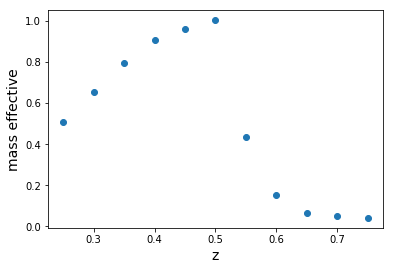

In [24]:
mass_interloper = 1e9
plt.plot(zds,mass_interloper/masses_sketchy, 'o')
plt.xlabel('z', size=14)
plt.ylabel('mass effective', size=14)
#plt.ylim(0,3)
#plt.gca().set_yscale('log')
#plt.ylim(1e-1,1e1)

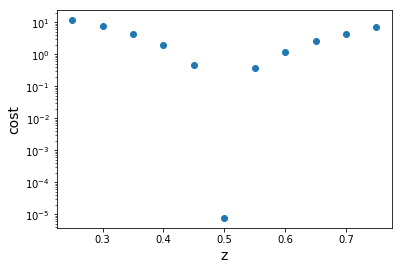

In [19]:
plt.plot(zds,[pf.cost for pf in pso_fit_list], 'o')
plt.xlabel('z', size=14)
plt.ylabel('cost', size=14)
plt.gca().set_yscale('log')

zd 0.25 (11.670795466292681)


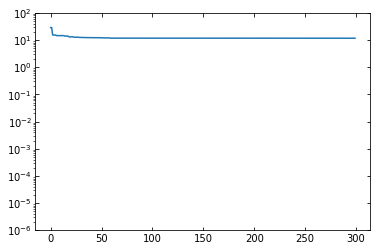

zd 0.3 (7.585039233555983)


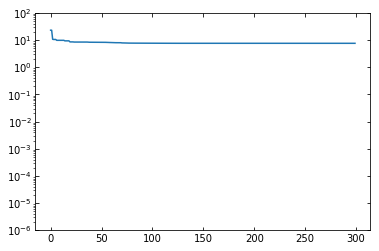

zd 0.35 (4.282537809125878)


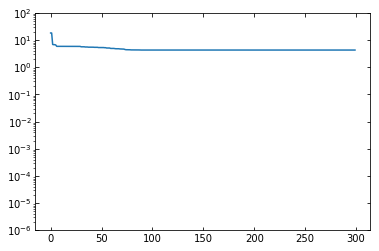

zd 0.4 (1.8998766526999784)


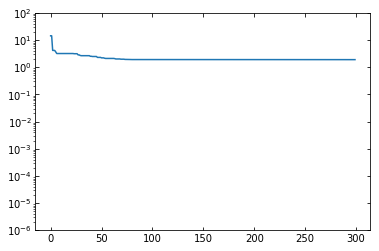

zd 0.45 (0.4731514336812854)


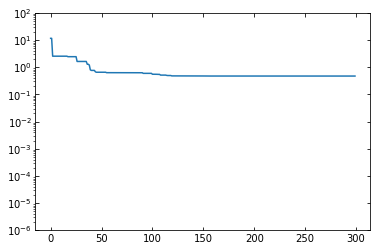

zd 0.5 (7.75280841064927e-06)


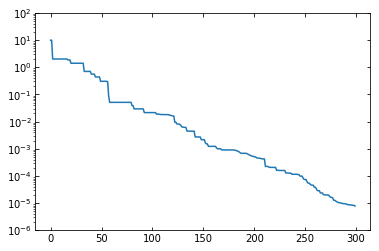

zd 0.55 (0.3880086884629258)


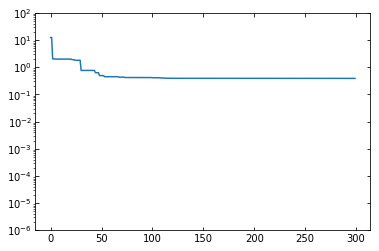

zd 0.6 (1.182392020220335)


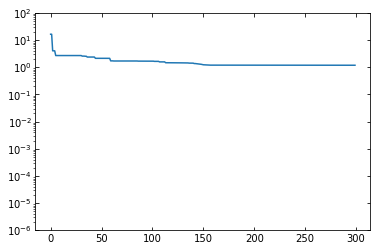

zd 0.65 (2.5784339328978927)


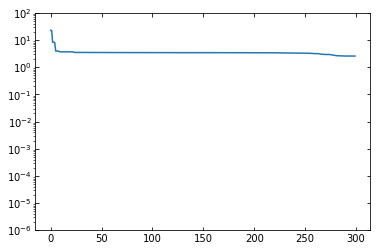

zd 0.7 (4.36787727797359)


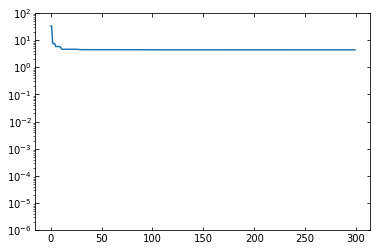

zd 0.75 (7.385403856970489)


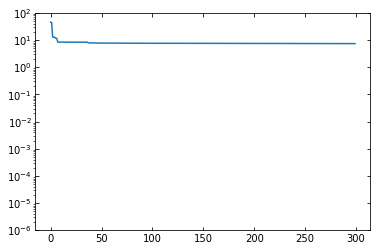

In [20]:
for zd, pso_fit in zip(zds, pso_fit_list):
    print('zd',zd, '({})'.format(pso_fit.cost))
    plt.plot(pso_fit.cost_history)
    plt.gca().set_yscale('log')
    plt.gca().tick_params(right=True, top=True, direction='in')
    plt.ylim(1e-6,1e2)
    plt.show()

cost 11.670795466292681
[-0.19173388224364138, -2.6229580737781437, -2.5815040061448, 9.345820482460576]
[0.25650378991288353, 0.007596056799867502, array(-1.7971705), array(9.97528826)]


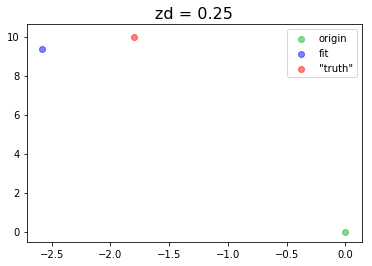

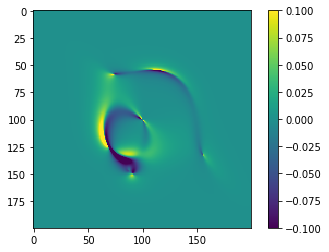

cost 7.585039233555983
[-0.361387474380758, -2.488094485519218, -2.4077102597095474, 9.553358837626838]
[0.22528796282227068, 0.007942824217928144, array(-1.7971705), array(9.97528826)]


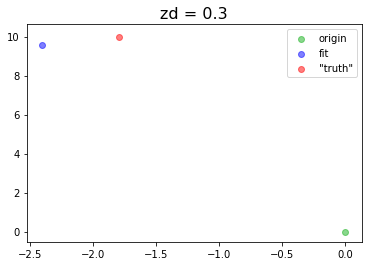

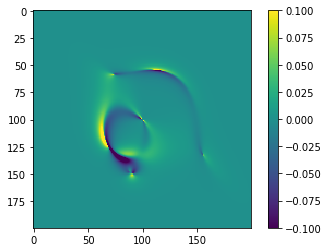

cost 4.282537809125878
[-0.5059224199511955, -2.367634182604749, -2.214002587923912, 9.734786563801299]
[0.2032558684086175, 0.008043951944350952, array(-1.7971705), array(9.97528826)]


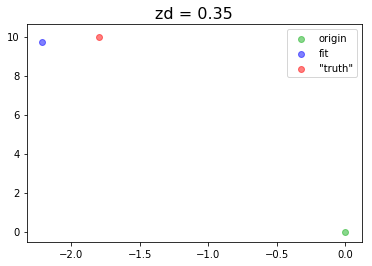

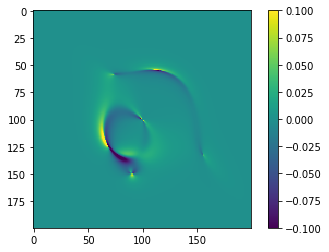

cost 1.8998766526999784
[-0.6229127246450384, -2.268892346872531, -2.0320082309792467, 9.862762893217068]
[0.1869661773777564, 0.007942797250114358, array(-1.7971705), array(9.97528826)]


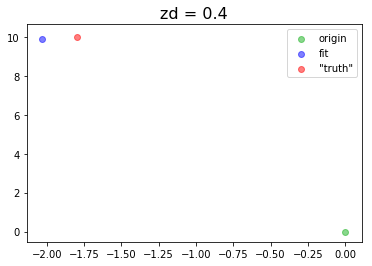

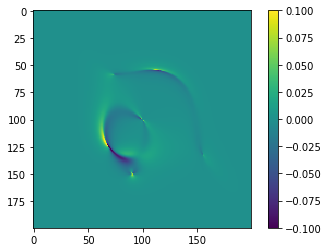

cost 0.4731514336812854
[-0.707241780507682, -2.2000260491743933, -1.9066368918164271, 9.92117892425529]
[0.17450663286877247, 0.007675989894136223, array(-1.7971705), array(9.97528826)]


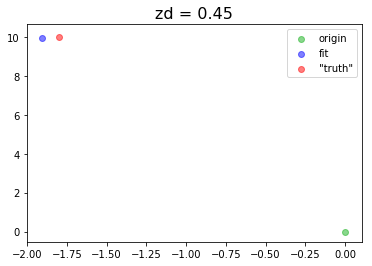

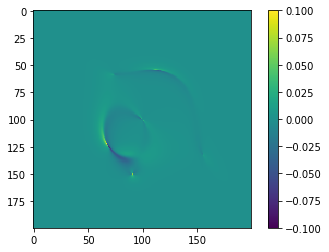

cost 7.75280841064927e-06
[-0.78498855633757, -2.136459052113054, -1.7969211680314878, 9.975585732228032]
[0.1647295558763404, 0.007274484653964195, array(-1.7971705), array(9.97528826)]


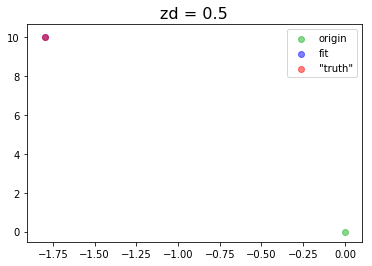

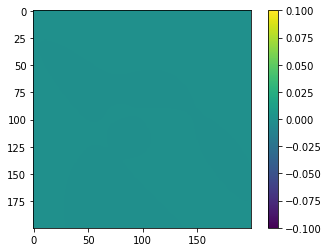

cost 0.3880086884629258
[-0.5365661663999284, -2.34240453407579, -1.816479962036841, 10.298134149445023]
[0.15690434585295304, 0.006764435300468178, array(-1.51616158), array(8.41553363)]


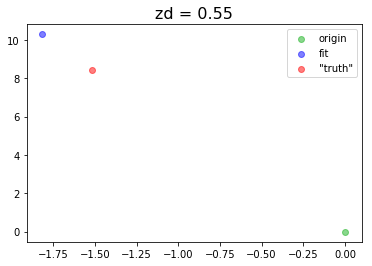

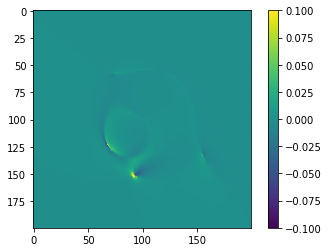

cost 1.182392020220335
[-0.2116877993781651, -2.6073580118367627, -2.3899769924145806, 10.678447959801717]
[0.15054372876563957, 0.006167925453386118, array(-1.27264843), array(7.06390128)]


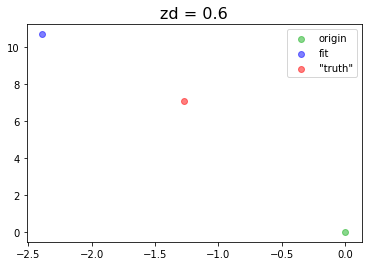

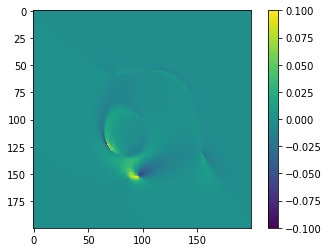

cost 2.5784339328978927
[-0.013098104673038239, -2.7250320676130113, -2.7548722580037115, 12.91564096848621]
[0.14531019599381498, 0.005503583155093836, array(-1.05799034), array(5.87243039)]


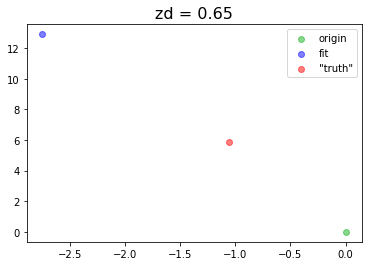

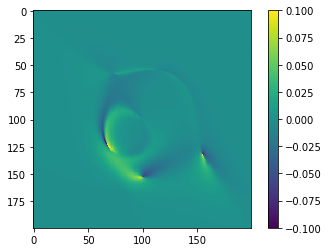

cost 4.36787727797359
[-0.003851381500428186, -2.7196592866583953, -4.759435367074204, 13.272813554401209]
[0.14096253852713608, 0.00478709986380277, array(-0.86601199), array(4.80684457)]


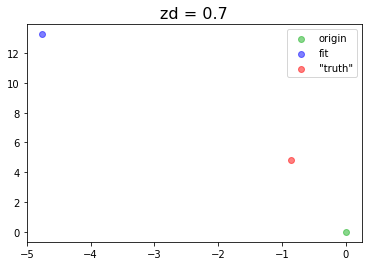

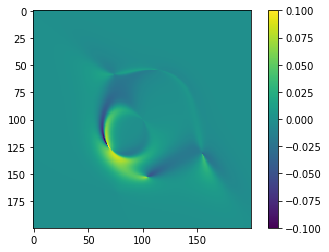

cost 7.385403856970489
[-0.028299739323021024, -2.670943262505119, -7.679557320939689, 14.395385011231065]
[0.1373237653168851, 0.0040316701240856335, array(-0.69218214), array(3.84199295)]


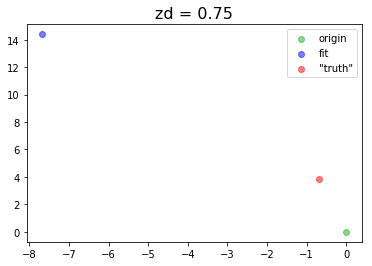

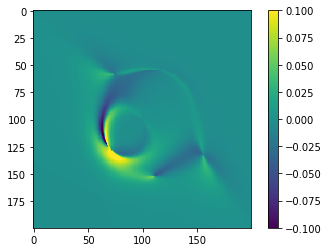

In [21]:
for zd,pf in zip(zds, pso_fit_list):
    nfw_idx = 2 if zl < zd else 1 # index of first nfw lens
    almost_truth_args = ([pf.image_obj.rsang, pf.image_obj.alphars]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_x'] for i in range(pf.N)]
                     +[pf.image_obj.kwargs_lens[nfw_idx+i]['center_y'] for i in range(pf.N)])
    print('cost', pf.cost)
    print(list(pf.pos))
    print(list(almost_truth_args))
    
    plt.scatter([0],[0], color='xkcd:green', label='origin', alpha=.5)
    for idx in range(2,2+pf.N):
        plt.scatter(pf.pos[idx],pf.pos[idx+pf.N], color='blue', alpha=.5,
                    label='fit' if idx==2 else None)
        plt.scatter(almost_truth_args[idx], almost_truth_args[idx+pf.N], color='red', alpha=.5,
                    label='"truth"' if idx==2 else None)
    plt.legend()
    plt.title('zd = {}'.format(zd),fontsize=16)
    plt.show()
    
    masked = pf.image-pf.pso_img
    masked[100][100] = 0
    plt.imshow(masked, vmin=vmin, vmax=vmax); plt.colorbar()
    plt.show()

In [ ]:
# almost_truth_args

In [ ]:
#plt.imshow(pso_fit.almost_truth_img - pso_fit.image, vmin=vmin, vmax=vmax)

In [ ]:
# get_mass_back(almost_truth_args[0], almost_truth_args[1], .5, 1)

In [ ]:
# import pickle
# with open('pso_fit_list2.p', 'wb') as f:
#     pickle.dump(pso_fit_list, f)

## Old cells...

In [ ]:
def partition(liszt, n):
    ''' Divides a list `liszt` into `n` nearly equal parts 
    (useful for pooling)'''
    lenliszt = len(liszt)
    short = lenliszt//n # how long is a short part
    nlong = lenliszt - short*n # remainder after integer division
    
    # list of lengths
    length_list = [short]*(n-nlong) + [short+1]*nlong
    
    ans = []
    counter = 0
    for length in length_list:
        ans.append(liszt[counter:counter+length])
        counter += length
        
    return ans    